# Introduction

On this page, I'll employ three clustering techniques to analyze Villanova's 2021-22 NCAA shot data (the same data from the dimensionality-reduction tab), considering all six features: lag1 (previous shot), shot_value, field_goal_percentage, game_num, home_crowd, and score_diff. The primary objective is to uncover patterns within the dataset through k-means, DBSCAN, and hierarchical clustering. Each step of the process will be explained in a straightfowrad manner with interpretations of the results.

### Import libraries and load the dataset

In [29]:
# import the necessary packages...
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# read in the feature dataset
df = pd.read_csv('./data/modified_data/nova_features.csv')

# KMeans

### Theory

K-Means clustering, a widely recognized algorithm, is valued for its simplicity and effectiveness, making it particularly appealing in various applications. This technique involves grouping data points into 'k' clusters, where 'k' is a user-specified parameter. The algorithm starts by assigning random points to these clusters, with centroids acting as their centers. Distances, usually calculated using Euclidean distance, guide the process. Iteratively, points shift between clusters, and new centroids emerge through Lloyd's algorithm until no better cluster assignments are feasible.
<br></br>
K-Means' core lies in optimizing the sum of squared distances between data points and their assigned cluster mean. The choice of 'k' dictates the number of centroids, which represent cluster centers. The algorithm strategically redistributes points to minimize the in-cluster sum of squares. Its simplicity and widespread usage make it a fundamental tool in unsupervised machine learning, showcasing its ability to uncover inherent patterns in data.
<br></br>
In a broader context, K-Means clustering serves as a technique to group data points based on their similarity to an average grouping. Distance metrics, such as Euclidean or Manhattan distance, play a pivotal role, and normalizing input data becomes crucial for robust performance. Centroids, serving as the algorithm's starting point, evolve through successive iterations, refining cluster assignments and centroids' positions. The algorithm's convergence reveals meaningful clusters, transforming data chaos into structured insights. Implementation through sklearn's KMeans algorithm enhances efficiency, and feature selection enables practitioners to customize the clustering process to their data's nuances.

### Implementation

In [30]:
# import relevent libraries for clustering. we will use KMeans, AgglomerativeClustering, MeanShift, Birch, and DBSCAN
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.cluster import MeanShift, Birch
from sklearn.metrics import pairwise_distances, silhouette_score
import random

The below code performs K-Means clustering for different numbers of clusters (ranging from 2 to 10). For each cluster number, it calculates and stores the distortion, which measures the average Euclidean distance between each data point and its assigned cluster center. Inertia is also computed and stored, representing the sum of squared distances of data points to their closest cluster center. Additionally, the silhouette score is determined and recorded, offering insights into how well-defined and separated the clusters are. The results, encompassing these crucial metrics—distortion, inertia, and silhouette score—are then organized into a DataFrame for detailed analysis and printed. This is in an attempt to identify the optimal number of clusters based on a comprehensive evaluation of these key clustering indicators.

In [31]:
# Create empty lists to store the results
clus = []
distortions = []
inertias = []
silhouette_scores = []

# Loop through the range of clusters
for i in range(2, 11):  # Silhouette score is not defined for a single cluster
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df)  
    clus.append(i)
    centers = kmeans.cluster_centers_
    distortions.append(sum(np.min(pairwise_distances(df, centers, metric='euclidean'), axis=1)) / df.shape[0])
    inertias.append(kmeans.inertia_)
    
    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))

# Create a DataFrame from the lists
results = pd.DataFrame({'Cluster': clus, 'Distortion': distortions, 'Inertia': inertias, 'Silhouette Score': silhouette_scores})

print(results)

/Users/williammcgloin/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/williammcgloin/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/williammcgloin/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/williammcgloin/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/williammcgloin/anaconda3/lib/python3.

   Cluster  Distortion        Inertia  Silhouette Score
0        2   10.622510  447410.233953          0.372238
1        3    8.828917  272970.775541          0.408870
2        4    7.974259  215311.617146          0.390174
3        5    6.985968  163526.599625          0.380241
4        6    6.394550  134984.307974          0.368484
5        7    5.753101  113388.811614          0.384348
6        8    5.309537   94219.154891          0.403127
7        9    5.020084   83855.750340          0.403238
8       10    4.698719   75156.752577          0.386414


Among the tested cluster counts (2 to 10), the silhouette score, a measure of cluster quality, is highest when there are three clusters. A silhouette score close to 1 indicates well-separated clusters. In this case, the silhouette score peaks at three clusters, suggesting that the data is most naturally organized into this number of distinct groups. This finding signifies a meaningful and clear grouping in the data, enabling better understanding and interpretation of underlying patterns.
<br></br>
The subsequent block of code generates three plots: one for distortion, one for inertia, and one for the silhouette score. Each plot has the number of clusters on the x-axis and the corresponding metric on the y-axis. These visualizations help interpret the results, allowing for the identification of trends and patterns.

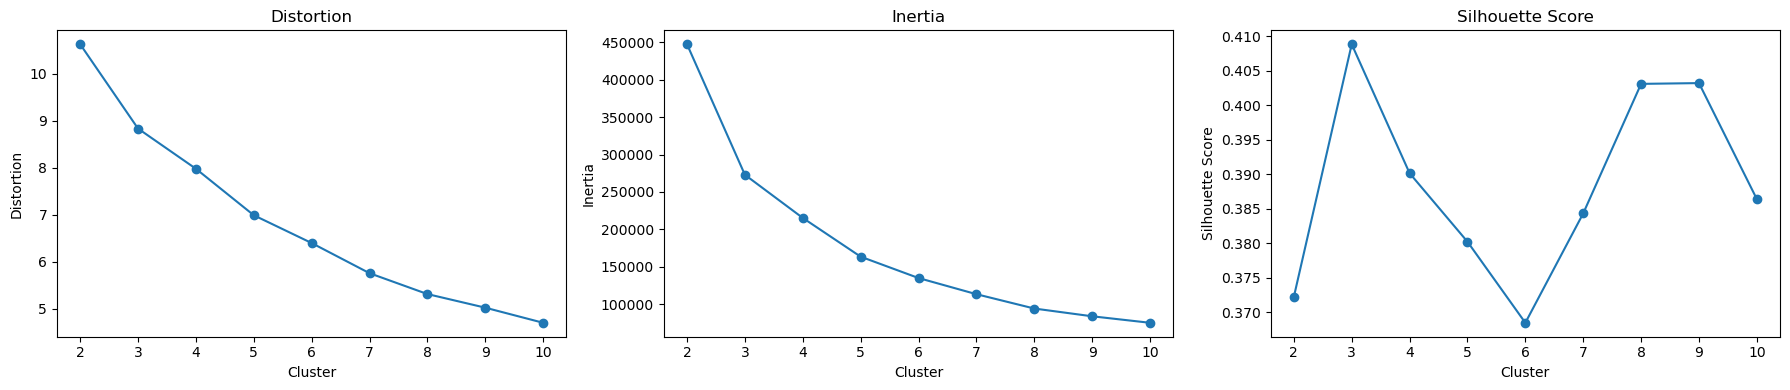

In [39]:
# Create subplots with 1 row and 3 columns
fig, ax = plt.subplots(1, 3, figsize=(18, 4))

# Plot Distortion
ax[0].plot(results['Cluster'], results['Distortion'], marker='o')
ax[0].set_title('Distortion')
ax[0].set_xlabel('Cluster')
ax[0].set_ylabel('Distortion')

# Plot Inertia
ax[1].plot(results['Cluster'], results['Inertia'], marker='o')
ax[1].set_title('Inertia')
ax[1].set_xlabel('Cluster')
ax[1].set_ylabel('Inertia')

# Plot Silhouette Score
ax[2].plot(results['Cluster'], results['Silhouette Score'], marker='o')
ax[2].set_title('Silhouette Score')
ax[2].set_xlabel('Cluster')
ax[2].set_ylabel('Silhouette Score')

# Display the side-by-side plots
plt.tight_layout()
plt.show()

The analysis of the graphs and results indicates that opting for 3 clusters is appropriate. The elbow and silhouette score methods suggest that this choice effectively captures meaningful patterns within the data. Having 3 clusters strikes a balance between simplicity and preserving relevant information. The subsequent 3D scatter plot visually represents the clustered data points in a three-dimensional space, offering a comprehensive view of the results.

In [34]:
pca_result = pd.read_csv('./data/modified_data/nova_pca.csv')

import plotly.express as px

# Assuming pca_result has columns '0', '1', and '2'
fig = px.scatter_3d(pca_result, x='0', y='1', z='2', color=labels, symbol=labels, opacity=0.7,
                    size_max=10, title='3D Scatter Plot of PC1, PC2, and PC3 with Cluster Labels',
                    labels={'0': 'Principal Component 1 (PC1)',
                            '1': 'Principal Component 2 (PC2)',
                            '2': 'Principal Component 3 (PC3)',
                            'color': 'Cluster'},
                    )
fig.show()

# DBSCAN

### Theory

DBSCAN, or Density-Based Spatial Clustering of Applications with Noise, is a robust clustering algorithm that distinguishes clusters based on the density of data points, incorporating both distance metrics and a minimum number of points. Unlike K-Means, DBSCAN doesn't require users to specify the number of clusters ('k') in advance; instead, it dynamically identifies clusters by expanding neighborhoods around data points.
<br></br>
The algorithm starts by randomly selecting and expanding a neighborhood around a data point. If the density within this neighborhood is sufficient, a cluster is formed, and the process iterates until no more data points can be added. Outliers are identified as points in low-density regions. DBSCAN's strength lies in its ability to uncover clusters of arbitrary shapes and sizes, making it particularly valuable for datasets where the number of clusters is unknown.
<br></br>
DBSCAN requires two key parameters: epsilon (ε) and minimum samples. Epsilon defines the maximum distance between two points for them to be considered in the same cluster, while minimum samples specify the minimum number of points required in each cluster. Experimentation is often needed to find optimal parameters, as the algorithm's outcome is sensitive to these choices.
<br></br>
In summary, DBSCAN offers a unique approach to clustering, emphasizing data density over distances to centroids. Its flexibility in identifying clusters of varying shapes and the ability to mark outliers enhances its effectiveness in exploring complex datasets. Implementation through sklearn's DBSCAN module provides a practical means to apply this algorithm to diverse datasets.

### Implementation

The below code performs an exhaustive search for optimal parameters (epsilon and minimum samples) for the DBSCAN algorithm. It calculates silhouette scores for different combinations of epsilon values (z1) and minimum sample sizes (z2), aiming to identify the best configuration that yields the highest silhouette score and the corresponding number of clusters. The resulting dataframe, df1, is then printed and visualized with a line plot.

    Epsilons  Best_Clusters  Best_Silhouette
0        0.5            595         0.065783
1        0.6            595         0.065783
2        0.7            595         0.065783
3        0.8            595         0.065783
4        0.9            595         0.065783
5        1.0            456         0.020257
10       1.5             33        -0.029439
11       1.6             33        -0.029439
12       1.7             33        -0.029439
6        1.1            216        -0.040136
7        1.2            216        -0.040136
8        1.3            216        -0.040136
9        1.4            216        -0.040136
13       1.8             22        -0.117656
14       1.9             22        -0.117656


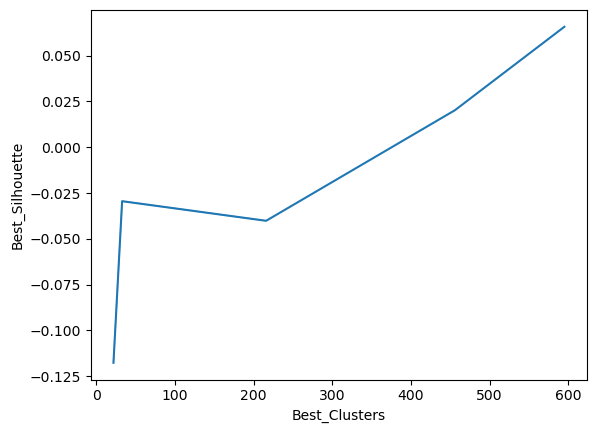

In [35]:
best_scores = []
eps = []
clus = []
z1 = [i / 10 for i in range(5, 20)]
z2 = range(2, 10) # explain why 2 to 10 or just do 1 to 10 but then u have to fix smth in the code if i dont remember wrong. i suggest explaining is a common assumption to do here

for i in z1:
    max_score = -1
    best_cluster = -1
    best_eps = -1
    for j in z2:
        model = DBSCAN(eps=i, min_samples=j)
        predics = model.fit_predict(df)
        num_clusters = len(pd.Series(predics).unique())
        if num_clusters > 1:
            score = silhouette_score(df, predics)
            if score > max_score:
                max_score = score
                best_cluster = num_clusters
                best_eps = i

    best_scores.append(max_score)
    clus.append(best_cluster)
    eps.append(best_eps)

df1 = pd.DataFrame({'Epsilons': eps, 'Best_Clusters': clus, 'Best_Silhouette': best_scores})
print(df1.sort_values(by="Best_Silhouette", ascending=False))
sns.lineplot(data=df1, x='Best_Clusters',y='Best_Silhouette')
plt.show()

The results suggest that varying epsilon values from 0.5 to 0.9 consistently yield a high number of clusters (595) with a low silhouette score (0.065783). This pattern persists, indicating that DBSCAN struggles to identify distinct clusters, possibly due to the nature of the data. The diminishing silhouette scores as epsilon increases, coupled with the large number of clusters, may imply that this clustering method is not well-suited for the dataset. To validate this observation, hierarchical clustering and visualization through T-SNE plots will be explored for further confirmation.

# Hierarchical Clustering (Agglomerative Clustering)

### Theory

Hierarchical Clustering, also known as Agglomerative Clustering, is a versatile algorithm that builds a hierarchy of clusters without the need to predefine the number of clusters. It treats each data point individually and progressively merges the closest clusters until forming a single cluster, using methods like Ward's method to calculate distances. The resulting linkage matrix constructs a dendrogram, enabling visualization of clustering hierarchy and facilitating the choice of cluster count. Normalizing input data is crucial for meaningful results, and the choice of linkage method, such as ward linkage, influences cluster formation.
<br></br>
Hierarchical Clustering focuses on finding clusters based on distance, repeatedly finding the two closest points and forming clusters until all points are assigned. The algorithm is sensitive to distance, requiring multiple runs with different distance values, and scaling the dataset to mitigate outlier effects. This method's adaptability and visualization through a dendrogram make it valuable for exploring data structures.

### Implementation

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward') #chose 3 as that is the number of species. We could have changed it.
labels = hierarchical_cluster.fit_predict(df)
print("Cluster Labels total:")
print(list(set(labels)))

Cluster Labels total:
[0, 1, 2]


/Users/williammcgloin/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



Let's generates a dendrogram for Agglomerative Clustering, visualizing the hierarchical linkage between data points.

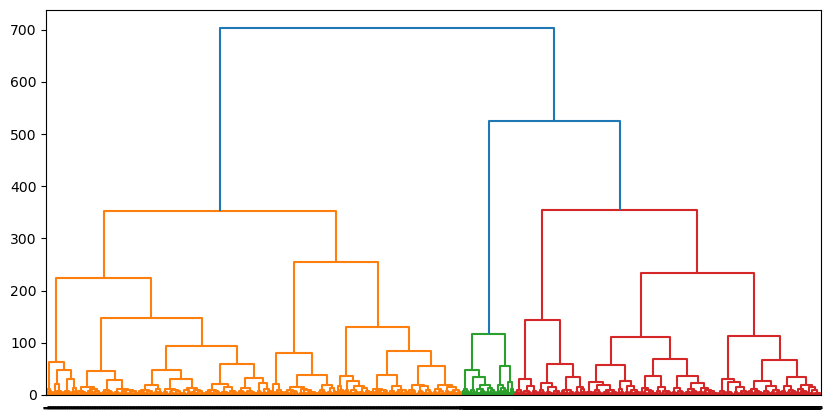

In [37]:
# create linkage for agglomerative clustering, and the dendrogram for the linkage. Suggest the optimal number of clusters based on the dendrogram.
linkage_matrix = linkage(df, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, orientation='top', labels=labels, distance_sort='ascending', show_leaf_counts=True)
plt.show()

The below code defines a function that performs hierarchical clustering on input data, varying the number of clusters. It calculates silhouette scores for each clustering iteration and outputs the optimal number of clusters that maximizes the silhouette score, in addition to plotting a graph showing how the silhouette score changes with different cluster numbers. The last lines of code apply this function to the data.

Maximum Silhouette score = 0.3971383731982046
OPTIMAL CLUSTERS (btwn 2-10) = 3


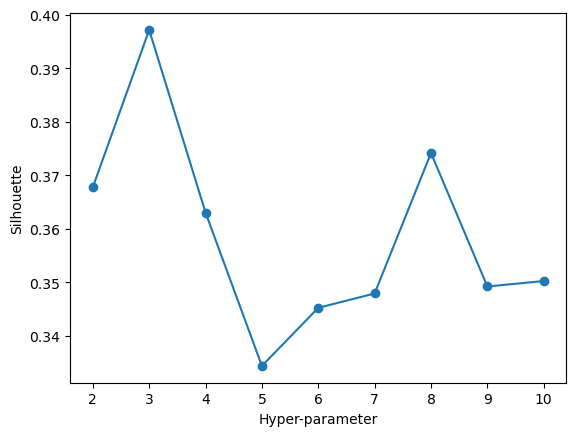

In [38]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import sklearn.cluster

def maximize_silhouette(X, algo="ag", nmax=None, i_plot=False):
    # PARAM
    i_print = False

    # FORCE CONTIGUOUS
    X = np.ascontiguousarray(X)

    # LOOP OVER HYPER-PARAM
    params = []
    sil_scores = []
    sil_max = -10

    for param in range(2, nmax + 1):
        if algo == "ag":
            model = AgglomerativeClustering(n_clusters=param).fit(X)
            labels = model.labels_
            
            try:
                sil_scores.append(silhouette_score(X, labels))
                params.append(param)
            except ValueError:
                continue

            if i_print:
                print(param, sil_scores[-1])

            if sil_scores[-1] > sil_max:
                opt_param = param
                sil_max = sil_scores[-1]
                opt_labels = labels

    print("Maximum Silhouette score =", sil_max)
    print("OPTIMAL CLUSTERS (btwn 2-10) =", opt_param)

    if i_plot:
        fig, ax = plt.subplots()
        ax.plot(params, sil_scores, "-o")
        ax.set(xlabel='Hyper-parameter', ylabel='Silhouette')
        plt.show()

    return opt_labels

# Example usage:
opt_labels = maximize_silhouette(df, algo="ag", nmax=10, i_plot=True)


The results from the code suggest that, within the considered range of 2 to 10 clusters, the maximum silhouette score for agglomerative clustering is achieved at 3 clusters, indicating it as the optimal number of clusters. This aligns with the observed trend in K-Means clustering, where both methods highlight 3 clusters as optimal based on the silhouette score.

# Conclusions

The analysis using K-Means and hierarchical clustering both implied the presence of three clusters within the dataset, providing a consistent pattern. However, DBSCAN did not seem well-suited for this dataset, suggesting varying performance across clustering methods. This indicates the potential for meaningful clustering, and further exploration in the Dimensionality Reduction tab may unveil clearer insights into the distinctive patterns within the data.

# Extra Joke

Movie Pitch: It’s a movie about high school girls trying to figure out what clique they belong in. They move from clique to clique and eventually stop when they minimize their differences. It’s called K-Means girls.
<br></br>
![](./images/mean_girls.gif)